## IBM DATA ANALYST CAPSTONE PROJECT

### CAPSTONE PROJECT :  "TECHNOLOGY TREND ANALYSIS"

### By: Christopher Achubie

### INTRODUCTION

In fufillment of the IBM Data Analyst Professional Certificate, and completing a Caspstone Project, I'm working as a Data Analyst recently hired by a global IT and business consulting services firm that is known for their expertise in IT solutions and their team of highly experienced IT consultants.

In order to keep pace with changing technologies and remain competitive, my organization regularly analyzes data to help identify future skill requirements. As a Data Analyst, I will be assisting with this initiative, and have been tasked with collecting data from various sources and identifying trends for this year's report on emerging skills.


Firstly, I will begin by scraping internet web sites. And also collect the top programming skills that are most in demand from a Stack Overflow Developer 2019 Survey.

Once this is completed,  data will be made ready for analysis using data wrangling techniques and then applying statistical techniques to analyze the data. Analyzing the data and identify insights and trends may include the following:

*What are the top programming languages in demand?

*What are the top database skills in demand?

*What are the popular IDEs?

After analyzing the data, I'll bring all of my information together by using IBM Cognos Analytics to create a dashboard. And finally, share my findings in a PowerPoint presentation.

### DATA COLLECTION



In [1]:
# Import Required Libraries
import requests
import pandas as pd

### Collecting Data Using Webscrapping
Extract information from the website below.
The data to scrape contains the name of the Programming Language and Average Annual Salary

In [2]:
# This url contains the data to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

In [3]:
# Import the required libraries

from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

In [4]:
# Get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text 

In [5]:
# Create a soup object
soup = BeautifulSoup(data,"html5lib")

In [6]:
# Scrape the Language name and annual average salary.

table = soup.find('table') # in html table is represented by the tag <table>
data = []
for row in table.find_all('tr'):
    col = row.find_all('td')
    lang_name = col[1].getText()
    avg_salary = col[3].getText()
    data.append([lang_name, avg_salary])
data

[['Language', 'Average Annual Salary'],
 ['Python', '$114,383'],
 ['Java', '$101,013'],
 ['R', '$92,037'],
 ['Javascript', '$110,981'],
 ['Swift', '$130,801'],
 ['C++', '$113,865'],
 ['C#', '$88,726'],
 ['PHP', '$84,727'],
 ['SQL', '$84,793'],
 ['Go', '$94,082']]

In [7]:
# Save the scrapped data into a file named popular-languages.csv

import pandas as pd
df=pd.DataFrame(data)#.set_index("Language name")
new_header = df.iloc[0]
df = df[1:] 
df.columns = new_header 
df = df.reset_index(drop=True)
df

,Language,Average Annual Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


In [8]:
df.to_csv('popular-languages.csv')

### Survey Datasets Exploration

In [9]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"

In [10]:
# Load the data available at dataset_url into a dataframe.
df = pd.read_csv(dataset_url)

In [11]:
# Explore the Dataset.
df.head()   #The head displays the top 5 rows and columns from your dataset.

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [12]:
# Number of Rows
df.shape[0]

11552

In [13]:
# Number of Columns
df.shape[1]

85

In [14]:
# Data types for each column
df.dtypes

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object

In [15]:
# Mean Age of Survey Participant
df["Age"].mean()

30.77239449133718

In [16]:
# Number of unique countries in the Country column
df["Country"].nunique()

135

### DATA WRANGLING

Data wrangling or data munging is the process of removing errors and combining 
complex data sets to make them more accessible and easier to analyze. Here we will identify 
and remove duplicate rows, find and impute missing values and normalize the data.

### Finding and Removing Duplicate Data

In [17]:
# Finding duplicates (how many duplicate rows exist in the dataframe.)
df.duplicated(keep='first').sum()

154

In [18]:
# Removing duplicates
df.drop_duplicates(ignore_index=True, inplace=True)

In [19]:
# Verify if duplicates were actually dropped.
df.duplicated(keep='first').sum()

0

In [20]:
df.shape

(11398, 85)

### Finding and Imputing Missing Values

In [21]:
# Finding Missing values (Lets find the missing values for all columns.)
df.isnull().sum()

Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       542
Ethnicity       675
Dependents      140
SurveyLength     19
SurveyEase       14
Length: 85, dtype: int64

In [22]:
# Number of rows missing in the column "WorkLoc"
df["WorkLoc"].isnull().sum()

32

In [23]:
# Number of rows missing in the column "EdLevel"
df["EdLevel"].isnull().sum()

112

In [24]:
# Number of rows missing in the column "Country"
df["Country"].isnull().sum()

0

In [25]:
# Imputing missing values (Lets find the value counts for the column WorkLoc)
df["WorkLoc"].value_counts()

Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: WorkLoc, dtype: int64

Identify the value that is most frequent (majority) in the WorkLoc column.
The majority value here is 'Office'.
Then Impute (replace) all the empty rows in the column WorkLoc with the value that you have identified as majority.

In [26]:
df["WorkLoc"].fillna(value="Office",inplace=True)

After imputation there should ideally not be any empty rows in the WorkLoc column.
Verify if imputing was successful.

In [27]:
df["WorkLoc"].value_counts()

Office                                            6838
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: WorkLoc, dtype: int64

In [28]:
df["WorkLoc"].isnull().sum()

0

### Normalizing Data

There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq".

This makes it difficult to compare the total compensation of the developers.

We will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

Once this column is ready, it makes comparison of salaries easy.

In [29]:
#Various categories in the column 'CompFreq'
df["CompFreq"].unique()

array(['Yearly', 'Monthly', 'Weekly', nan], dtype=object)

Create a new column named 'NormalizedAnnualCompensation'

In [30]:
df["CompFreq"].replace(to_replace="Yearly",value=1,inplace=True)
df["CompFreq"].replace(to_replace="Monthly",value=12,inplace=True)
df["CompFreq"].replace(to_replace="Weekly",value=52,inplace=True)

In [31]:
df["CompFreq"].unique()

array([ 1., 12., 52., nan])

In [32]:
df["CompFreq"].value_counts()

1.0     6073
12.0    4788
52.0     331
Name: CompFreq, dtype: int64

In [33]:
df['NormalizedAnnualCompensation'] = df["CompTotal"] * df["CompFreq"]
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,NormalizedAnnualCompensation
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,61000.0
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,138000.0
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy,90000.0
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,348000.0
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy,90000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult,130000.0
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,74400.0
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy,105000.0
11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,NaN,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,80000.0


In [34]:
df["Respondent"].nunique()

11398

In [35]:
df["ConvertedComp"].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

<AxesSubplot:>

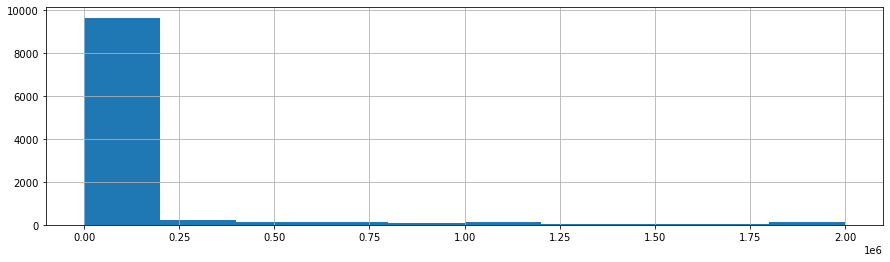

In [36]:
df["ConvertedComp"].hist(figsize=(15,4))

In [37]:
df['NormalizedAnnualCompensation'].median()

100000.0

In [38]:
df.to_csv("M2_DW.csv",index=False)



### EXPLORATORY DATA ANALYSIS



In this exploratory data analysis. we will find out the distribution of data, 
presence of outliers and also determine the correlation between different columns in the dataset.

### Analyzing the data distribution

In [39]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

The column ConvertedComp contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.

Lets plot the distribution curve for the column ConvertedComp.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Plot the histogram for the column ConvertedComp

C:\Users\chrix\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


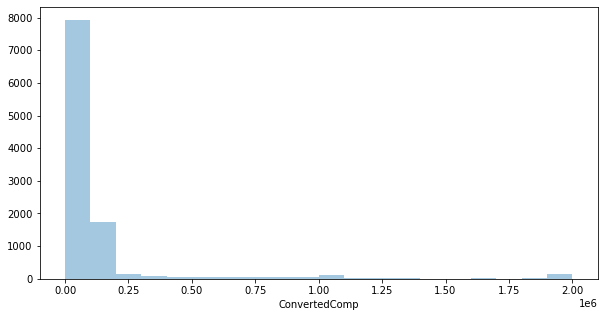

In [41]:
plt.figure(figsize=(10,5))
sns.distplot(a=df["ConvertedComp"],bins=20,kde=False)
plt.show()

In [42]:
# Median of the column ConvertedComp
df["ConvertedComp"].median()

57745.0

In [43]:
# Mean of the column ConvertedComp
df["Age"].median()

29.0

In [44]:
# Gender Value Count
df["Gender"].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [45]:
# Median ConvertedComp of responders identified themselves only as a Man
woman = df[df["Gender"] == "Man"]
woman["ConvertedComp"].median()

57744.0

In [46]:
# Median ConvertedComp of responders identified themselves only as a Woman
woman = df[df["Gender"] == "Woman"]
woman["ConvertedComp"].median()

57708.0

In [47]:
# Summary for the column Age
df["Age"].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Lets plot a histogram of the column Age.

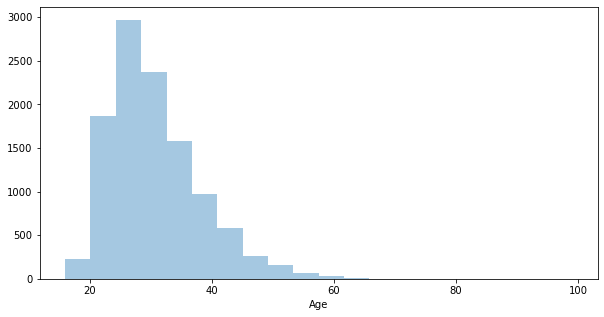

In [48]:
plt.figure(figsize=(10,5))
sns.distplot(a=df["Age"],bins=20,kde=False)
plt.show()

### Identifying and removing outliers

Find out if outliers exist in the column ConvertedComp using a box plot

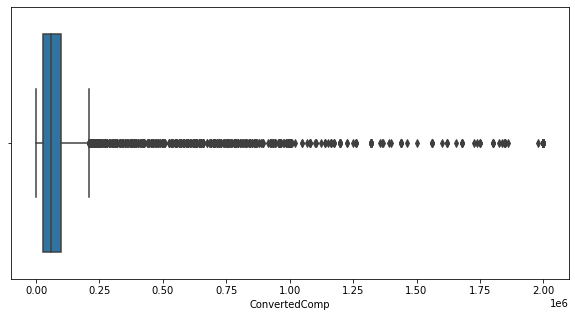

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.ConvertedComp, data=df)
plt.show()

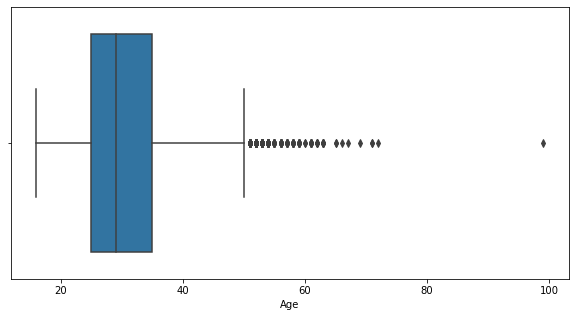

In [50]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.Age, data=df)
plt.show()

Find out the Inter Quartile Range for the column ConvertedComp.

In [51]:
df["ConvertedComp"].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [52]:
# Median Converted Comp before removing outliers
df["ConvertedComp"].median()

57745.0

In [53]:
# Inter Quartile Range for the column ConvertedComp

1.000000e+05 - 2.686800e+04

73132.0

Find out the upper and lower bounds.

In [54]:
Q1 = df["ConvertedComp"].quantile(0.25)
Q3 = df["ConvertedComp"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

73132.0


Identify how many outliers are there in the ConvertedComp column.

In [55]:
outliers = (df["ConvertedComp"] < (Q1 - 1.5 * IQR)) | (df["ConvertedComp"] > (Q3 + 1.5 * IQR))
outliers.value_counts()

False    10519
True       879
Name: ConvertedComp, dtype: int64

Create a new dataframe by removing the outliers from the ConvertedComp column.

In [56]:
less = (df["ConvertedComp"] < (Q1 - 1.5 * IQR))
less.value_counts()

False    11398
Name: ConvertedComp, dtype: int64

In [57]:
more = (df["ConvertedComp"] > (Q3 + 1.5 * IQR))
more.value_counts()

False    10519
True       879
Name: ConvertedComp, dtype: int64

In [58]:
RemoveConvertedcomp = df[~(df["ConvertedComp"] > (Q3 + 1.5 * IQR))]
RemoveConvertedcomp.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy


In [59]:
# Median Converted Comp after removing outliers
RemoveConvertedcomp["ConvertedComp"].median()

52704.0

In [60]:
# Mean Converted Comp after removing outliers
RemoveConvertedcomp["ConvertedComp"].mean()

59883.20838915799

### Correlation

Lets find the correlation between Age and all other numerical columns

In [61]:
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


### DATA VISUALIZATION

### Visualizing relationships in data

#### Scatter Plots

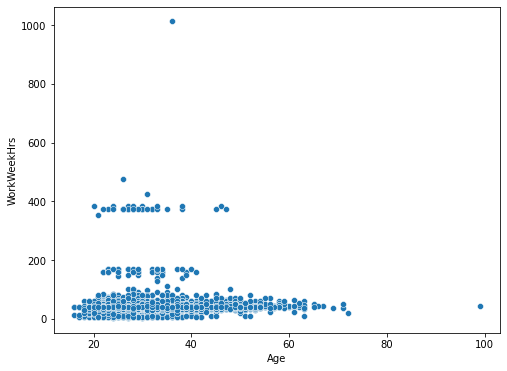

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='WorkWeekHrs', data=df)

plt.show()


#### Bubble Plots

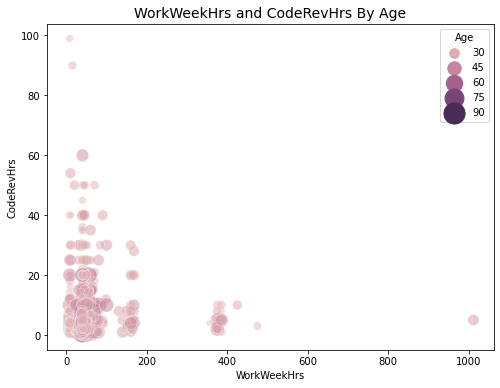

In [63]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='WorkWeekHrs', y='CodeRevHrs', size='Age', hue='Age', alpha=0.5, sizes=(10, 500)) 

plt.title('WorkWeekHrs and CodeRevHrs By Age', size=14) 
plt.xlabel('WorkWeekHrs', size=10) 
plt.ylabel('CodeRevHrs', size=10)

plt.show()

### PRESENTATION OF FINDINGS

The story of the project analysis is presented on a PowerPoint template.
Click on the link below to view presentation

###### https://1drv.ms/p/s!ApEXLB-uX7f6gZsrceiaIJp9VLjQpg?e=l0bb2n